In [110]:
import pandas as pd
import tabulate as tb

df = pd.read_excel('Shiftsmart Case Study - Business + Product - Dataset.xlsx')

df

,shift_UUID,market,store,role,shift_date,shift_dow,shift_hour,duration,rate,base_wage_potential,...,canceled_late,noShow,Confirmed_noShow,NotConfirmed_noShow,completed,eligble_partners,n_sent_partners,n_accepted_partners,n_miles_completed,n_not_sent
0,ea3da3ea-d642-4db3-b7b3-c58d4ddf8ad7,NaN,NaN,Role 1,2022-01-03,2,16,4.0,12.0,48.0,...,0,1,1,0,0,27,15,1,NaN,0
1,7e8117a2-6623-4352-b499-12bda78e8330,NaN,NaN,Role 1,2022-01-07,6,7,4.0,13.0,52.0,...,0,0,0,0,1,29,20,1,30.000000,0
2,4d3102b5-ab7a-4cfe-9d1f-1a36d53df94f,NaN,NaN,Role 1,2022-01-14,6,7,4.0,13.0,52.0,...,0,0,0,0,1,11,11,1,30.000000,0
3,409d9c07-64a9-4ef0-bafc-42fcd3c135f2,NaN,NaN,Role 1,2022-01-17,2,20,4.0,12.0,48.0,...,0,1,1,0,0,238,238,3,NaN,0
4,f0b25bf8-a46e-428b-9453-8abab9a0cc2e,NaN,NaN,Role 1,2022-01-10,2,17,4.0,12.0,48.0,...,0,0,0,0,1,11,0,1,30.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16475,a51eec8c-f404-4a23-b8ac-6b692b2bc2c3,4378,4701392.0,Role 1,2022-01-17,2,18,4.0,12.0,48.0,...,0,1,1,0,0,4,4,1,NaN,0
16476,21a8793a-7e9e-4f31-9b72-204c27b6c5db,4378,4701392.0,Role 1,2022-01-13,5,22,4.0,12.0,48.0,...,0,1,1,0,0,64,48,1,NaN,0
16477,2e3085f5-172f-42f2-a48a-5194d5a8fe5c,4378,4701392.0,Role 1,2022-01-10,2,21,4.0,12.0,48.0,...,0,0,0,0,1,48,48,1,3.168714,0
16478,e79959ed-baf3-4b8d-8609-5d79a00e78b1,4378,4701392.0,Role 3,2022-01-13,5,22,4.0,12.0,48.0,...,0,1,1,0,0,65,48,1,NaN,0


# Null analysis

In [116]:
# Count null values in each column
null_counts = df.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Optional: Show percentage of null values
null_percentages = (df.isnull().sum() / len(df)) * 100
table_data = []
for column, percentage in null_percentages.items():
    if percentage > 1:  # Only show columns with null values
        table_data.append([column, f"{percentage:.1f}%"])

headers = ['Column', 'Null Percentage']
print("Columns with null values greater than 1%:")
print(tb.tabulate(table_data, headers=headers, tablefmt='grid'))

Null values in each column:
shift_UUID                 0
market                    10
store                     10
role                       0
shift_date                 0
shift_dow                  0
shift_hour                 0
duration                  50
rate                      50
base_wage_potential       50
total_wage_potential      50
bonus                   7454
completed_partner       6421
n_sent                     0
n_sent_miles_0_5          50
n_sent_miles_6_10         50
n_sent_miles_11_15        50
n_sent_miles_16_20        50
n_sent_miles_21_25        50
n_sent_miles_26_30        50
n_sent_miles_30_100       50
n_accepted                 0
no_accepts                 0
canceled_early             0
canceled_late              0
noShow                     0
Confirmed_noShow           0
NotConfirmed_noShow        0
completed                  0
eligble_partners           0
n_sent_partners            0
n_accepted_partners        0
n_miles_completed       6449
n_not_sent     

# Overview

In [75]:
# Get Percentage of completed shifts
completed_counts = df['completed'].value_counts()
print(f"\nValue counts for completed:")
print(completed_counts)
print(f"\nPercentage of completed shifts:")
print(round(completed_counts.iloc[0]/len(df) * 100, 2), '%')

# Get Percentage of noShow shifts
noShow_counts = df['noShow'].value_counts()
print(f"\nValue counts for noShow:")
print(noShow_counts)
print(f"\nPercentage of noShow shifts:")
print(round(noShow_counts.iloc[1]/len(df) * 100, 2), '%')

# Get Percentage of accepted shifts
n_accepts_counts = df['n_accepted'].value_counts()
print(f"\nValue counts for n_accepted:")
print(n_accepts_counts)
print(f"\nPercentage of accepted shifts:")
print(round(n_accepts_counts.iloc[0]/len(df) * 100, 2), '%')

#Get percentage of canceled
canceled_late_counts = df['canceled_late'].value_counts()
print(f"\nValue counts for canceled_late:")
print(canceled_late_counts)
print(f"\nPercentage of canceled_late shifts:")
print(round(canceled_late_counts.iloc[1]/len(df) * 100, 2), '%')

canceled_early_counts = df['canceled_early'].value_counts()
print(f"\nValue counts for canceled_early:")
print(canceled_early_counts)
print(f"\nPercentage of canceled_early shifts:")
print(round(canceled_early_counts.iloc[1]/len(df) * 100, 2), '%')

# #Where any canceled shifts fulfilled?
# fulfilled = df[df['completed'] == 1]
# fulfilled_canceled = fulfilled[(fulfilled['canceled_late'] == 1) | (fulfilled['canceled_early'] == 1)]
# print(f"\nValue counts for fulfilled_canceled:")
# print(len(fulfilled_canceled))

# #Get percentage of n_sent
# sent_counts = df['n_sent'].value_counts()
# print(f"\nValue counts for n_sent:")
# print(sent_counts)
# print(f"\nPercentage of n_sent shifts:")
# print(round(sent_counts.iloc[0]/len(df) * 100, 2), '%')






Value counts for completed:
completed
1    10031
0     6449
Name: count, dtype: int64

Percentage of completed shifts:
60.87 %

Value counts for noShow:
noShow
0    13788
1     2692
Name: count, dtype: int64

Percentage of noShow shifts:
16.33 %

Value counts for n_accepted:
n_accepted
1    14296
0     2184
Name: count, dtype: int64

Percentage of accepted shifts:
86.75 %

Value counts for canceled_late:
canceled_late
0    15192
1     1288
Name: count, dtype: int64

Percentage of canceled_late shifts:
7.82 %

Value counts for canceled_early:
canceled_early
0    16196
1      284
Name: count, dtype: int64

Percentage of canceled_early shifts:
1.72 %


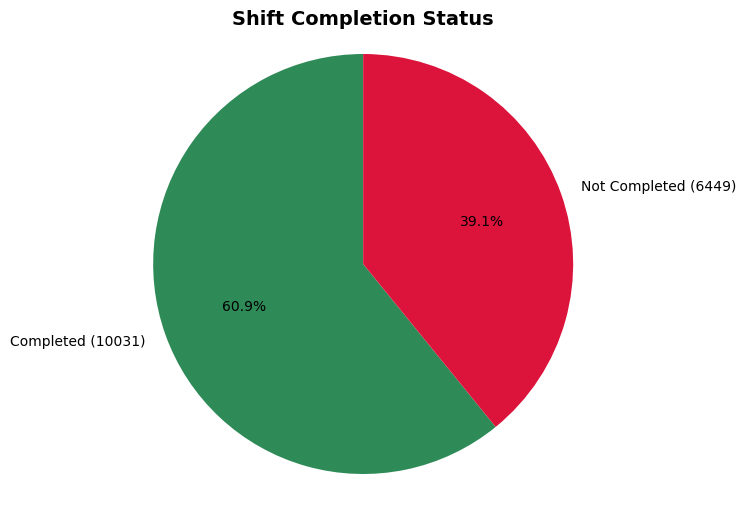

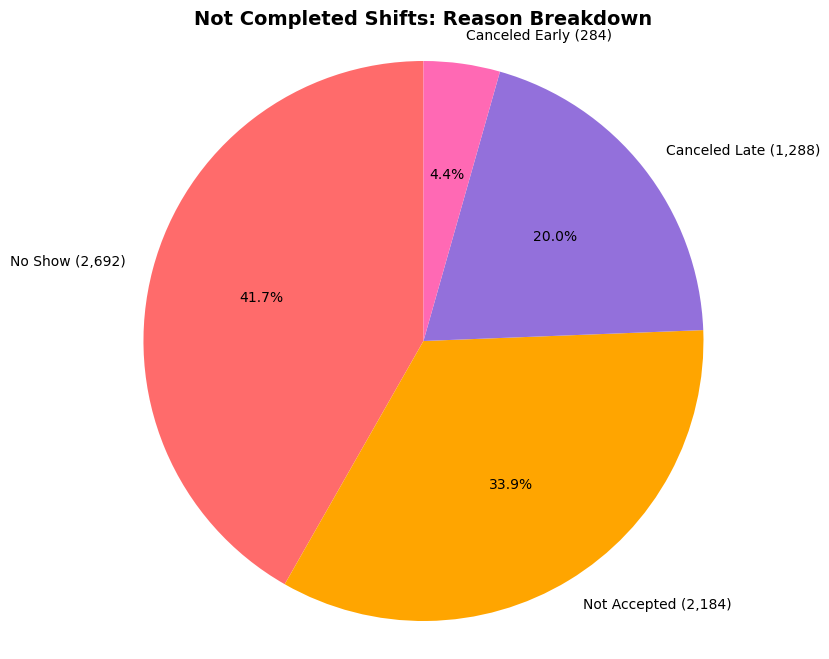

In [77]:
import matplotlib.pyplot as plt

#Visual for completed shifts
# Create labels and sizes for the pie chart
labels = [f'Completed ({completed_counts.iloc[0]})', f'Not Completed ({completed_counts.iloc[1]})']
sizes = [completed_counts.iloc[0], completed_counts.iloc[1]]
colors = ['#2E8B57', '#DC143C']  # Green for completed, Red for not completed

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Shift Completion Status', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

#Visual for notCompletedBreakdown
 #Create data for pie chart using iloc[1] values
labels = [
    f'No Show ({noShow_counts.iloc[1]:,})', 
    f'Not Accepted ({n_accepts_counts.iloc[1]:,})', 
    f'Canceled Late ({canceled_late_counts.iloc[1]:,})', 
    f'Canceled Early ({canceled_early_counts.iloc[1]:,})'
]
sizes = [
    noShow_counts.iloc[1],      # No Show (1)
    n_accepts_counts.iloc[1],   # Not Accepted (0)
    canceled_late_counts.iloc[1], # Canceled Late (1)
    canceled_early_counts.iloc[1]  # Canceled Early (1)
]
colors = ['#FF6B6B', '#FFA500', '#9370DB', '#FF69B4']  # Red, Orange, Purple, Pink

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Not Completed Shifts: Reason Breakdown', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

# Deep Dive Code

2424
268


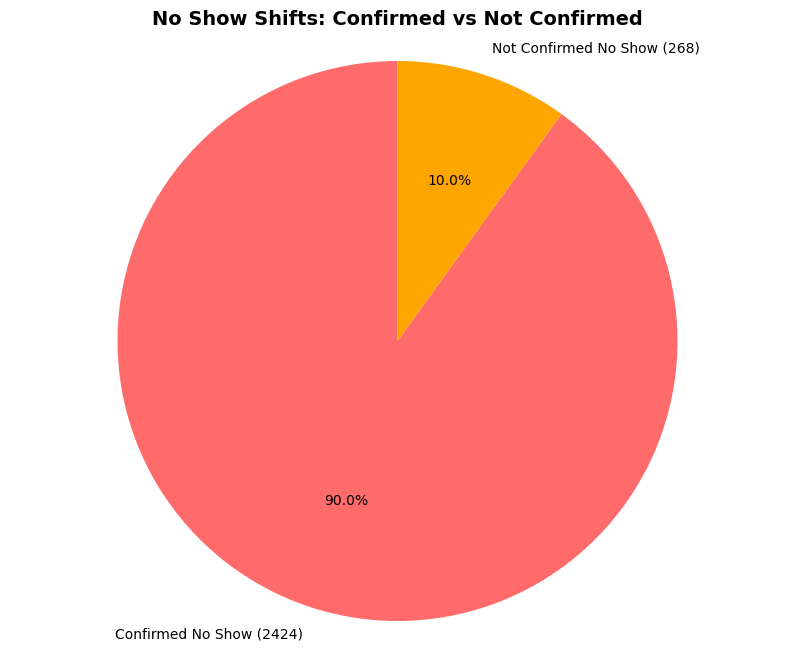

In [19]:
#No Show analyse 
totalConfirmed_noShow = df['Confirmed_noShow'].sum()
totalNotConfirmed_noShow = df['NotConfirmed_noShow'].sum()

print(totalConfirmed_noShow)
print(totalNotConfirmed_noShow)

 #Create data for pie chart using iloc[1] values
labels = [
    f'Confirmed No Show ({totalConfirmed_noShow})', 
    f'Not Confirmed No Show ({totalNotConfirmed_noShow})'
]
sizes = [totalConfirmed_noShow, totalNotConfirmed_noShow]

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('No Show Shifts: Confirmed vs Not Confirmed', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()



In [105]:
#NotAccepted analysis
import tabulate as tb
#Create a new dataframe with only the not accepted shifts
dfNotAccepted = df[df['n_accepted'] == 0]
dfAccepted = df[df['n_accepted'] == 1]

print("UNDERSTAND ACCEPTED")
print('Mean accepted for Completed Shifts: ', dfAccepted['n_accepted_partners'].mean())
print('Std accepted for Completed Shifts: ', dfAccepted['n_accepted_partners'].std())



UNDERSTAND ACCEPTED
Mean accepted for Completed Shifts:  1.630875769445999
Std accepted for Completed Shifts:  0.8845623819611645


In [88]:
print("\nDistance sent for Not Accepted")
notAccpted_miles_dict = {}
for col in dfNotAccepted.columns:
    if 'n_sent_miles' in col:
        col_name = col
        notAccpted_miles_dict[col_name] = dfNotAccepted[col_name].mean().round(0)
df_table = pd.DataFrame(list(notAccpted_miles_dict.items()), 
                       columns=['Column Name', 'Mean'])
print(df_table)

print("\nDistance sent for Accepted")
Accpted_miles_dict = {}
for col in dfAccepted.columns:
    if 'n_sent_miles' in col:
        col_name = col
        Accpted_miles_dict[col_name] = dfAccepted[col_name].mean().round(0)
df_table = pd.DataFrame(list(Accpted_miles_dict.items()), 
                       columns=['Column Name', 'Mean'])
print(df_table)

import tabulate as tb
table_data = []
for col_name in notAccpted_miles_dict.keys():
    not_accepted_mean = notAccpted_miles_dict[col_name]
    accepted_mean = Accpted_miles_dict.get(col_name, 0)
    table_data.append([col_name, not_accepted_mean, accepted_mean, not_accepted_mean - accepted_mean])

headers = ['Distance', 'Mean Sends for Not Accepted', 'Mean Sends for Accepted', 'Difference']
print(tb.tabulate(table_data, headers=headers, tablefmt='grid'))


Distance sent for Not Accepted
           Column Name  Mean
0     n_sent_miles_0_5  11.0
1    n_sent_miles_6_10  25.0
2   n_sent_miles_11_15  32.0
3   n_sent_miles_16_20  27.0
4   n_sent_miles_21_25  19.0
5   n_sent_miles_26_30  17.0
6  n_sent_miles_30_100  55.0

Distance sent for Accepted
           Column Name  Mean
0     n_sent_miles_0_5  23.0
1    n_sent_miles_6_10  45.0
2   n_sent_miles_11_15  48.0
3   n_sent_miles_16_20  35.0
4   n_sent_miles_21_25  27.0
5   n_sent_miles_26_30  23.0
6  n_sent_miles_30_100  69.0
+---------------------+-------------------------------+---------------------------+--------------+
| Distance            |   Mean Sends for Not Accepted |   Mean Sends for Accepted |   Difference |
+=====================+===============================+===========================+==============+
| n_sent_miles_0_5    |                            11 |                        23 |          -12 |
+---------------------+-------------------------------+-------------------------


START PARTNER DEEP DIVES
Not Acceptedn_sent_partners:  129.0
Accepted n_sent_partners:  200.0


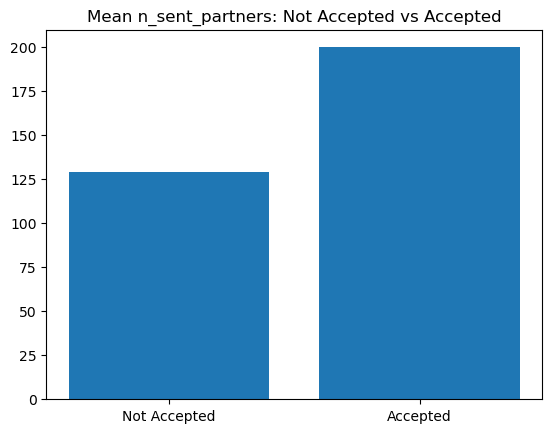

In [103]:
print("\nSTART PARTNER DEEP DIVES")
not_accepted_mean = dfNotAccepted['n_sent_partners'].mean().round(0)
accepted_mean = dfAccepted['n_sent_partners'].mean().round(0)
print('Not Acceptedn_sent_partners: ', not_accepted_mean)
print('Accepted n_sent_partners: ', accepted_mean)

plt.bar(['Not Accepted', 'Accepted'], [not_accepted_mean, accepted_mean])
plt.title('Mean n_sent_partners: Not Accepted vs Accepted')
plt.show()

In [109]:
# print('Mean Distance (miles) for Completed Shifts: ', dfAccepted['n_miles_completed'].mean())
# print('Std Distance (miles) for Completed Shifts: ', dfAccepted['n_miles_completed'].std())
desc = dfAccepted['n_miles_completed'].describe()
stats = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

table_data = [[stat, f"{desc[stat]:.0f}"] for stat in stats]
print(tb.tabulate(table_data, headers=['Statistic', 'n_miles_completed'], tablefmt='grid'))

+-------------+---------------------+
| Statistic   |   n_miles_completed |
+=============+=====================+
| mean        |                  13 |
+-------------+---------------------+
| std         |                  10 |
+-------------+---------------------+
| min         |                   0 |
+-------------+---------------------+
| 25%         |                   4 |
+-------------+---------------------+
| 50%         |                   9 |
+-------------+---------------------+
| 75%         |                  20 |
+-------------+---------------------+
| max         |                  30 |
+-------------+---------------------+


# Appendix Code



Total Accepted:  14296


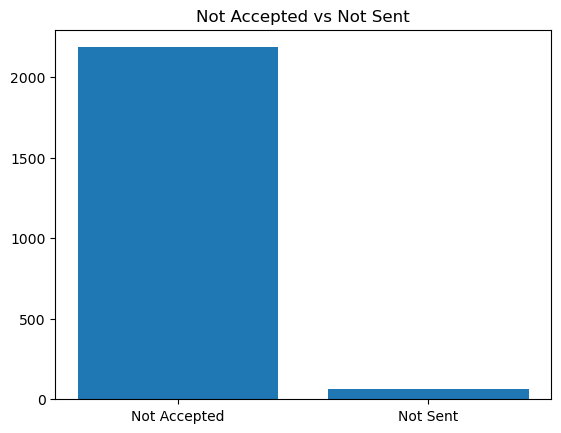

In [117]:
# print("\nTotal Not Accepted: ", len(dfNotAccepted))
# print("Total Not Sent to Partners (not accepted): ", dfNotAccepted['n_not_sent'].sum())
print("\nTotal Accepted: ", len(dfAccepted))

not_accepted = len(dfNotAccepted)
not_sent = dfNotAccepted['n_not_sent'].sum()

plt.bar(['Not Accepted', 'Not Sent'], [not_accepted, not_sent])
plt.title('Not Accepted vs Not Sent')
plt.show()

In [ ]:
print(dfNotAccepted['total_wage_potential'].describe())
print(dfNotAccepted['rate'].describe())

print(dfAccepted['total_wage_potential'].describe())
print(dfAccepted['rate'].describe())

count    2134.000000
mean       77.009372
std         4.889008
min        48.000000
25%        73.000000
50%        77.000000
75%        78.000000
max        95.000000
Name: total_wage_potential, dtype: float64
count    2134.000000
mean       12.583177
std         0.706936
min        12.000000
25%        12.000000
50%        12.000000
75%        13.000000
max        14.500000
Name: rate, dtype: float64

Total Accepted:  14296
count    14296.000000
mean        62.972562
std         16.159556
min         24.000000
25%         48.000000
50%         63.000000
75%         73.000000
max        240.000000
Name: total_wage_potential, dtype: float64
count    14296.000000
mean        13.067641
std          2.466304
min         11.000000
25%         12.000000
50%         12.000000
75%         13.000000
max         30.000000
Name: rate, dtype: float64


In [94]:
difference = dfAccepted['eligble_partners'] - dfAccepted['n_sent_partners']
positive_differences = difference[difference > 0]
total = positive_differences.sum()
count = len(positive_differences)
print("Accepted difference in eligible vs sent: ", "total: ", total, "count: ", count)

difference = dfNotAccepted['eligble_partners'] - dfNotAccepted['n_sent_partners']
positive_differences = difference[difference > 0]
total = positive_differences.sum()
count = len(positive_differences)
print("Not Accepted difference in eligible vs sent: ", "total: ", total, "count: ", count)


Accepted difference in eligible vs sent:  total:  1009113 count:  9643
Not Accepted difference in eligible vs sent:  total:  116253 count:  1611


In [63]:
#NO SHOW and CANCELLED PAY RATE and DURATION ANALSYSIS
dfNoShow = df[df['noShow'] == 1]
dfCancelled = df[(df['canceled_early'] == 1) | (df['canceled_late'] == 1)]
dfCompleted = df[df['completed'] == 1]

print(dfCompleted['total_wage_potential'].mean())
print(dfCompleted['total_wage_potential'].std())

print(dfNoShow['total_wage_potential'].mean())
print(dfNoShow['total_wage_potential'].std())

print(dfCancelled['total_wage_potential'].mean())
print(dfCancelled['total_wage_potential'].std())

61.84430764629648
16.90665508131438
63.10698365527489
13.83810663918992
69.95133587786259
12.890236491775976


In [121]:
import tabulate as tb

# Get the data for not accepted and no showed shifts
dfNotAccepted = df[df['n_accepted'] == 0]
dfNoShow = df[df['noShow'] == 1]

# Columns to analyze
columns_to_analyze = ['market',  'role', 'shift_dow', 'shift_hour', 'duration']

# Create tables for each column
for col in columns_to_analyze:
    print(f"\n{'='*60}")
    print(f"ANALYSIS FOR: {col.upper()}")
    print(f"{'='*60}")
    
    # Get value counts for each group
    not_accepted_counts = dfNotAccepted[col].value_counts()
    no_show_counts = dfNoShow[col].value_counts()
    
    # Create table data
    table_data = []
    all_values = list(set(not_accepted_counts.index) | set(no_show_counts.index))
    
    for value in all_values:
        not_accepted = not_accepted_counts.get(value, 0)
        no_show = no_show_counts.get(value, 0)
        total = not_accepted + no_show
        
        # Handle percentage calculations safely
        not_accepted_pct = (not_accepted/len(dfNotAccepted)*100) if len(dfNotAccepted) > 0 else 0
        no_show_pct = (no_show/len(dfNoShow)*100) if len(dfNoShow) > 0 else 0
        
        table_data.append([
            str(value),  # Convert to string to avoid comparison issues
            not_accepted,
            no_show,
            total,
            f"{not_accepted_pct:.1f}%",
            f"{no_show_pct:.1f}%"
        ])
    
    headers = [col.title(), 'Not Accepted', 'No Show', 'Total', 'Not Accepted %', 'No Show %']
    print(tb.tabulate(table_data, headers=headers, tablefmt='grid'))
    
    print(f"\nSummary:")
    print(f"Total Not Accepted: {len(dfNotAccepted):,}")
    print(f"Total No Show: {len(dfNoShow):,}")
    print(f"Total Shifts: {len(df):,}")


# # Get value counts as percentages
# duration_percentages = df['duration'].value_counts(normalize=True) * 100
# print(tabulate(duration_percentages))

# role_percentages = df['role'].value_counts(normalize=True) * 100
# print(tabulate(role_percentages))

day_percentages = df['shift_dow'].value_counts(normalize=True) * 100
print(day_percentages)

duration_percentages = df['duration'].value_counts(normalize=True) * 100
table_data = [[key, f"{value:.1f}%"] for key, value in duration_percentages.items()]
print(tb.tabulate(table_data, headers=['Duration', 'Percentage'], tablefmt='grid'))

print(f"\n{'='*60}")
print(f"Breakdown Overall - All Shifts")
print(f"{'='*60}")
role_percentages = df['role'].value_counts(normalize=True) * 100
table_data = [[key, f"{value:.1f}%"] for key, value in role_percentages.items()]
print(tb.tabulate(table_data, headers=['Role', 'Percentage'], tablefmt='grid'))


ANALYSIS FOR: MARKET
+----------+----------------+-----------+---------+------------------+-------------+
| Market   |   Not Accepted |   No Show |   Total | Not Accepted %   | No Show %   |
+==========+================+===========+=========+==================+=============+
| 4142     |             52 |        54 |     106 | 2.4%             | 2.0%        |
+----------+----------------+-----------+---------+------------------+-------------+
| 3119     |             15 |        13 |      28 | 0.7%             | 0.5%        |
+----------+----------------+-----------+---------+------------------+-------------+
| 4144     |             39 |        38 |      77 | 1.8%             | 1.4%        |
+----------+----------------+-----------+---------+------------------+-------------+
| 3128     |             19 |        50 |      69 | 0.9%             | 1.9%        |
+----------+----------------+-----------+---------+------------------+-------------+
| 4169     |              1 |        77 |  